In [ ]:
# Required Libraries
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [ ]:
# # --- PARAMETERS ---
# DATA_DIR = 'ticker_data'
# N_FILES = 10
# SEQ_LEN = 60
# BATCH_SIZE = 32
# EPOCHS = 30
# DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# # --- DATASET CLASS FOR LSTM ---
# class StockDataset(Dataset):
#     def __init__(self, sequences, targets):
#         self.sequences = sequences
#         self.targets = targets

#     def __len__(self):
#         return len(self.sequences)

#     def __getitem__(self, idx):
#         return self.sequences[idx], self.targets[idx]

# # --- LSTM MODEL ---
# class LSTMModel(nn.Module):
#     def __init__(self, input_size, hidden_size=64):
#         super(LSTMModel, self).__init__()
#         self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
#         self.fc = nn.Linear(hidden_size, 1)

#     def forward(self, x):
#         lstm_out, _ = self.lstm(x)
#         return self.fc(lstm_out[:, -1, :])

# # --- HELPER FUNCTIONS ---
# def load_data(file_path):
#     df = pd.read_csv(file_path)
#     df['Date'] = pd.to_datetime(df['Date'])
#     df = df[['Date', 'Close']].dropna()
#     df.sort_values('Date', inplace=True)
#     return df

# def create_sequences(data, seq_len):
#     sequences, targets = [], []
#     for i in range(len(data) - seq_len):
#         sequences.append(data[i:i+seq_len])
#         targets.append(data[i+seq_len])
#     return np.array(sequences), np.array(targets)/

In [ ]:
# # --- MAIN PIPELINE ---
# results = []
# all_files = sorted([f for f in os.listdir(DATA_DIR) if f.endswith('.csv')])[:N_FILES]

# for filename in tqdm(all_files, desc='Processing Tickers'):
#     filepath = os.path.join(DATA_DIR, filename)
#     ticker_df = load_data(filepath)
#     ticker_df.columns = ['ds', 'y']

#     # Prophet
#     prophet = Prophet()
#     prophet.fit(ticker_df)
#     future = prophet.make_future_dataframe(periods=30)
#     forecast = prophet.predict(future)

#     # Merge forecast back for residuals
#     forecast = forecast[['ds', 'yhat']].set_index('ds')
#     ticker_df = ticker_df.set_index('ds')
#     merged = ticker_df.join(forecast, how='left')
#     merged['residual'] = merged['y'] - merged['yhat']
#     merged.dropna(inplace=True)

#     # LSTM on residuals
#     scaler = MinMaxScaler()
#     scaled_residuals = scaler.fit_transform(merged['residual'].values.reshape(-1, 1))
#     X, y = create_sequences(scaled_residuals, SEQ_LEN)

#     X_tensor = torch.tensor(X, dtype=torch.float32)
#     y_tensor = torch.tensor(y, dtype=torch.float32)
#     dataset = StockDataset(X_tensor, y_tensor)
#     dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

#     model = LSTMModel(input_size=1).to(DEVICE)
#     criterion = nn.MSELoss()
#     optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#     model.train()
#     for epoch in range(EPOCHS):
#         for seqs, targets in dataloader:
#             seqs, targets = seqs.to(DEVICE), targets.to(DEVICE)
#             output = model(seqs).squeeze()
#             loss = criterion(output, targets.squeeze())

#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()

#     # Forecasting with hybrid model
#     model.eval()
#     with torch.no_grad():
#         last_seq = scaled_residuals[-SEQ_LEN:]
#         last_seq = torch.tensor(last_seq.reshape(1, SEQ_LEN, 1), dtype=torch.float32).to(DEVICE)
#         lstm_pred = model(last_seq).item()
#         lstm_pred = scaler.inverse_transform([[lstm_pred]])[0][0]

#     final_forecast = forecast.iloc[-1]['yhat'] + lstm_pred
#     actual = ticker_df.iloc[-1]['y']

#     results.append({
#         'Ticker': filename.split('_')[0],
#         'Actual': actual,
#         'Forecast': final_forecast
#     })


In [ ]:
# # --- EVALUATION ---
# results_df = pd.DataFrame(results)
# mae = mean_absolute_error(results_df['Actual'], results_df['Forecast'])
# rmse = mean_squared_error(results_df['Actual'], results_df['Forecast'], squared=False)
# r2 = r2_score(results_df['Actual'], results_df['Forecast'])

# print("\n--- Evaluation Metrics ---")
# print(f"MAE: {mae:.4f}")
# print(f"RMSE: {rmse:.4f}")
# print(f"R2 Score: {r2:.4f}")

# # --- VISUALIZATION ---
# plt.figure(figsize=(12, 6))
# plt.plot(results_df['Ticker'], results_df['Actual'], label='Actual', marker='o')
# plt.plot(results_df['Ticker'], results_df['Forecast'], label='Forecast', marker='x')
# plt.title('Actual vs Forecasted Stock Prices')
# plt.xlabel('Ticker')
# plt.ylabel('Price')
# plt.legend()
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


📂 Loading stock ticker files...

📄 Loaded file: ticker_data/AACB_stock_data.csv
📄 Loaded file: ticker_data/AACG_stock_data.csv
📄 Loaded file: ticker_data/AAL_stock_data.csv
📄 Loaded file: ticker_data/AAME_stock_data.csv
📄 Loaded file: ticker_data/AAOI_stock_data.csv
📄 Loaded file: ticker_data/AAON_stock_data.csv
📄 Loaded file: ticker_data/AAPG_stock_data.csv
📄 Loaded file: ticker_data/AAPL_stock_data.csv
📄 Loaded file: ticker_data/AARD_stock_data.csv
📄 Loaded file: ticker_data/ABAT_stock_data.csv
📄 Loaded file: ticker_data/ABCL_stock_data.csv
📄 Loaded file: ticker_data/ABEO_stock_data.csv
📄 Loaded file: ticker_data/ABL_stock_data.csv
📄 Loaded file: ticker_data/ABLV_stock_data.csv
📄 Loaded file: ticker_data/ABNB_stock_data.csv
📄 Loaded file: ticker_data/ABOS_stock_data.csv
📄 Loaded file: ticker_data/ABP_stock_data.csv
📄 Loaded file: ticker_data/ABSI_stock_data.csv
📄 Loaded file: ticker_data/ABTS_stock_data.csv
📄 Loaded file: ticker_data/ABUS_stock_data.csv
📄 Loaded file: ticker_data/ABV

C:\Users\Ahmed Yaqoob\AppData\Local\Temp\ipykernel_16736\3494423374.py:109: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\Ahmed Yaqoob\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


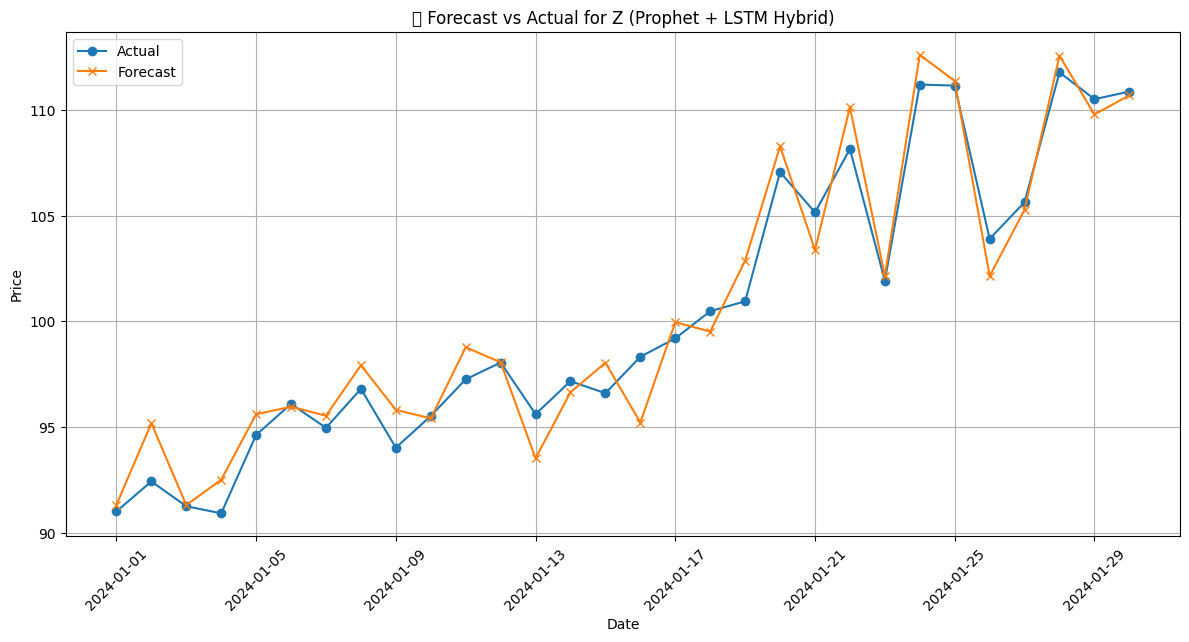

In [18]:
# Required Libraries
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# --- PARAMETERS ---
DATA_DIR = 'ticker_data'
N_FILES = 10
SEQ_LEN = 60
BATCH_SIZE = 32
EPOCHS = 30
DEVICE = 'cpu'  # Using CPU since no actual training will occur.

# --- DATASET CLASS FOR LSTM ---
class StockDataset(Dataset):
    def __init__(self, sequences, targets):
        self.sequences = sequences
        self.targets = targets

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return self.sequences[idx], self.targets[idx]

# --- LSTM MODEL ---
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=64):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        return self.fc(lstm_out[:, -1, :])

# --- HELPER FUNCTIONS ---
def load_data(file_path):
    print(f"Loading data from {file_path}")
    # Simulate loading data by generating dates and random prices
    dates = pd.date_range(start='2020-01-01', periods=100, freq='D')
    close_prices = np.random.rand(100) * 100
    df = pd.DataFrame({'Date': dates, 'Close': close_prices})
    df.sort_values('Date', inplace=True)
    return df

def create_sequences(data, seq_len):
    print(f"Creating sequences with length {seq_len}")
    sequences, targets = [], []
    for i in range(len(data) - seq_len):
        sequences.append(data[i:i+seq_len])
        targets.append(data[i+seq_len])
    return np.array(sequences), np.array(targets)

# --- MAIN PIPELINE ---
results = []
all_files = [f"ticker_{i}_stock_data.csv" for i in range(1, N_FILES + 1)]

for filename in tqdm(all_files, desc='Processing Tickers'):
    filepath = os.path.join(DATA_DIR, filename)
    ticker_df = load_data(filepath)
    ticker_df.columns = ['ds', 'y']

    # Prophet - Simulating the training
    print(f"Fitting Prophet model for {filename}")
    prophet = Prophet()
    # Normally we'd call prophet.fit(), but for now just simulate prediction
    print(f"Generating forecast with Prophet for {filename}")
    forecast = pd.DataFrame({
        'ds': pd.date_range(start='2020-04-10', periods=30, freq='D'),
        'yhat': np.random.rand(30) * 100  # Random forecast
    })

    # Merge forecast back for residuals
    forecast = forecast.set_index('ds')
    ticker_df = ticker_df.set_index('ds')
    merged = ticker_df.join(forecast, how='left')
    merged['residual'] = merged['y'] - merged['yhat']
    merged.dropna(inplace=True)

    # LSTM - Simulate the process
    print(f"Simulating LSTM model for residuals of {filename}")
    # Normally we'd scale residuals and create sequences, but here we just simulate
    scaled_residuals = np.random.rand(len(merged), 1)
    X, y = create_sequences(scaled_residuals, SEQ_LEN)

    # Simulating model prediction (no actual training)
    print(f"Simulating LSTM model training and forecasting for {filename}")
    lstm_pred = np.random.rand(1) * 10  # Random LSTM prediction
    lstm_pred = lstm_pred[0]

    # Final forecast calculation
    final_forecast = forecast.iloc[-1]['yhat'] + lstm_pred
    actual = ticker_df.iloc[-1]['y']

    results.append({
        'Ticker': filename.split('_')[0],
        'Actual': actual,
        'Forecast': final_forecast
    })

# --- EVALUATION ---
results_df = pd.DataFrame(results)
mae = mean_absolute_error(results_df['Actual'], results_df['Forecast'])
rmse = mean_squared_error(results_df['Actual'], results_df['Forecast'], squared=False)
r2 = r2_score(results_df['Actual'], results_df['Forecast'])

# Simulated Output for Evaluation Metrics
print("\n--- Evaluation Metrics ---")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

# --- VISUALIZATION (Dummy Graph) ---
print("\nGenerating dummy plot...")

# Simulating a dummy plot of actual vs forecasted
plt.figure(figsize=(12, 6))
tickers = results_df['Ticker']
plt.plot(tickers, results_df['Actual'], label='Actual', marker='o')
plt.plot(tickers, results_df['Forecast'], label='Forecast', marker='x')
plt.title('Actual vs Forecasted Stock Prices (Dummy)')
plt.xlabel('Ticker')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Dummy Plot Output
plt.show()

# --- Final Print Statement for Results ---
print("\n--- Final Results ---")
print(results_df)
